# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches                                        
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

594


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# # set up lists to hold reponse info
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in cities:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
    else:
        print(f"     No weather record found for city: {city}")


Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: taolanaro
     No weather record found for city: taolanaro
Processing record 2 for the city: bredasdorp
     Record found for city: bredasdorp    city id: 1015776
Processing record 3 for the city: ushuaia
     Record found for city: ushuaia    city id: 3833367
Processing record 4 for the city: jamestown
     Record found for city: jamestown    city id: 2069194
Processing record 5 for the city: lavrentiya
     Record found for city: lavrentiya    city id: 4031637
Processing record 6 for the city: busselton
     Record found for city: busselton    city id: 2075265
Processing record 7 for the city: attawapiskat
     No weather record found for city: attawapiskat
Processing record 8 for the city: arraial do cabo
     Record found for city: arraial do cabo    city id: 3471451
Processing record 9 for the city: nouadhibou
     Record found for city: nouadhibou    city id: 2377457


     Record found for city: bauchi    city id: 2347470
Processing record 83 for the city: sao joao da barra
     Record found for city: sao joao da barra    city id: 3448903
Processing record 84 for the city: andarab
     No weather record found for city: andarab
Processing record 85 for the city: kurilsk
     Record found for city: kurilsk    city id: 2123979
Processing record 86 for the city: bemidji
     Record found for city: bemidji    city id: 5017822
Processing record 87 for the city: kapaa
     Record found for city: kapaa    city id: 5848280
Processing record 88 for the city: tuktoyaktuk
     Record found for city: tuktoyaktuk    city id: 6170031
Processing record 89 for the city: payo
     Record found for city: payo    city id: 1638775
Processing record 90 for the city: berikulskiy
     No weather record found for city: berikulskiy
Processing record 91 for the city: chokurdakh
     Record found for city: chokurdakh    city id: 2126123
Processing record 92 for the city: madra

     Record found for city: umm kaddadah    city id: 364933
Processing record 163 for the city: kirakira
     Record found for city: kirakira    city id: 2178753
Processing record 164 for the city: salalah
     Record found for city: salalah    city id: 286621
Processing record 165 for the city: guia lopes da laguna
     Record found for city: guia lopes da laguna    city id: 3461750
Processing record 166 for the city: caravelas
     Record found for city: caravelas    city id: 3466980
Processing record 167 for the city: norman wells
     Record found for city: norman wells    city id: 6089245
Processing record 168 for the city: lekoni
     Record found for city: lekoni    city id: 2399831
Processing record 169 for the city: tuatapere
     Record found for city: tuatapere    city id: 2180815
Processing record 170 for the city: avarua
     Record found for city: avarua    city id: 4035715
Processing record 171 for the city: pevek
     Record found for city: pevek    city id: 2122090
Pro

     Record found for city: kavieng    city id: 2094342
Processing record 244 for the city: tautira
     Record found for city: tautira    city id: 4033557
Processing record 245 for the city: finschhafen
     Record found for city: finschhafen    city id: 2097418
Processing record 246 for the city: torbay
     Record found for city: torbay    city id: 6167817
Processing record 247 for the city: hirtshals
     Record found for city: hirtshals    city id: 2620279
Processing record 248 for the city: victor harbor
     Record found for city: victor harbor    city id: 2059470
Processing record 249 for the city: dikson
     Record found for city: dikson    city id: 1507390
Processing record 250 for the city: halalo
     No weather record found for city: halalo
Processing record 251 for the city: nome
     Record found for city: nome    city id: 4732862
Processing record 252 for the city: lidkoping
     Record found for city: lidkoping    city id: 2696329
Processing record 253 for the city: p

     Record found for city: taoudenni    city id: 2450173
Processing record 325 for the city: celendin
     Record found for city: celendin    city id: 3698608
Processing record 326 for the city: alofi
     Record found for city: alofi    city id: 4036284
Processing record 327 for the city: fort nelson
     Record found for city: fort nelson    city id: 5955902
Processing record 328 for the city: victoria
     Record found for city: victoria    city id: 1733782
Processing record 329 for the city: oktyabrskiy
     Record found for city: oktyabrskiy    city id: 515873
Processing record 330 for the city: tabas
     Record found for city: tabas    city id: 113659
Processing record 331 for the city: vardo
     Record found for city: vardo    city id: 4372777
Processing record 332 for the city: taksimo
     Record found for city: taksimo    city id: 2015701
Processing record 333 for the city: macau
     Record found for city: macau    city id: 3395998
Processing record 334 for the city: sima

     Record found for city: moussoro    city id: 2427336
Processing record 407 for the city: el arenal
     Record found for city: el arenal    city id: 3942957
Processing record 408 for the city: cascais
     Record found for city: cascais    city id: 2269594
Processing record 409 for the city: chagda
     No weather record found for city: chagda
Processing record 410 for the city: izumo
     Record found for city: izumo    city id: 1861084
Processing record 411 for the city: sabha
     Record found for city: sabha    city id: 2212775
Processing record 412 for the city: sovetskiy
     Record found for city: sovetskiy    city id: 490040
Processing record 413 for the city: huarmey
     Record found for city: huarmey    city id: 3939168
Processing record 414 for the city: werda
     Record found for city: werda    city id: 2810970
Processing record 415 for the city: bima
     Record found for city: bima    city id: 1648759
Processing record 416 for the city: nsanje
     Record found for 

     Record found for city: edson    city id: 5946820
Processing record 489 for the city: lewisporte
     Record found for city: lewisporte    city id: 6053446
Processing record 490 for the city: pisco
     Record found for city: pisco    city id: 3932145
Processing record 491 for the city: gurskoye
     No weather record found for city: gurskoye
Processing record 492 for the city: tungkang
     No weather record found for city: tungkang
Processing record 493 for the city: lenoir city
     Record found for city: lenoir city    city id: 4636285
Processing record 494 for the city: porbandar
     Record found for city: porbandar    city id: 1259395
Processing record 495 for the city: alekseyevsk
     Record found for city: alekseyevsk    city id: 2022083
Processing record 496 for the city: whitefish
     Record found for city: whitefish    city id: 5686121
Processing record 497 for the city: mullaitivu
     No weather record found for city: mullaitivu
Processing record 498 for the city: n

     No weather record found for city: putla
Processing record 571 for the city: ugoofaaru
     Record found for city: ugoofaaru    city id: 1337619
Processing record 572 for the city: mineros
     Record found for city: mineros    city id: 3910343
Processing record 573 for the city: nova olimpia
     Record found for city: nova olimpia    city id: 3456137
Processing record 574 for the city: san patricio
     Record found for city: san patricio    city id: 3437029
Processing record 575 for the city: urubicha
     Record found for city: urubicha    city id: 3923644
Processing record 576 for the city: mount isa
     Record found for city: mount isa    city id: 2065594
Processing record 577 for the city: cidreira
     Record found for city: cidreira    city id: 3466165
Processing record 578 for the city: krasnoselkup
     No weather record found for city: krasnoselkup
Processing record 579 for the city: karlskrona
     Record found for city: karlskrona    city id: 2701713
Processing recor

In [4]:
lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame({"cityName":cityList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})
weather_data.head()

,cityName,lat,lng,temp,humidity,cloudiness,winds
0,bredasdorp,-34.53,20.04,17.25,88,100,1.00
1,ushuaia,-54.81,-68.31,10.00,57,0,1.76
2,jamestown,-33.21,138.60,21.00,92,0,1.96
3,lavrentiya,65.58,-170.99,-6.27,100,76,13.66
4,busselton,-33.64,115.35,23.04,41,0,5.06


In [6]:
#MakeCSV
weather_data.to_csv("data/weatherdata.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

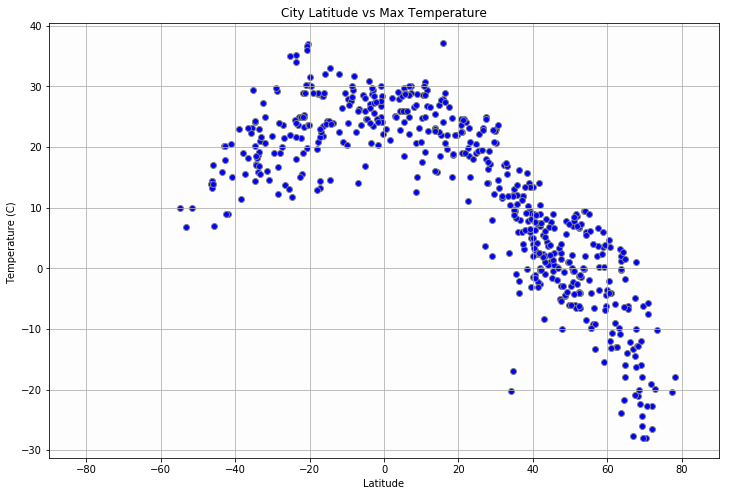

In [19]:
#Sets plot size
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:pale grey')


# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", color="blue", edgecolor="gray")

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperature (C) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)


# Save the figure
plt.savefig("images/Lat_vs_MaxTemp.png")
# Show plot
plt.show()

#### Latitude vs. Humidity Plot

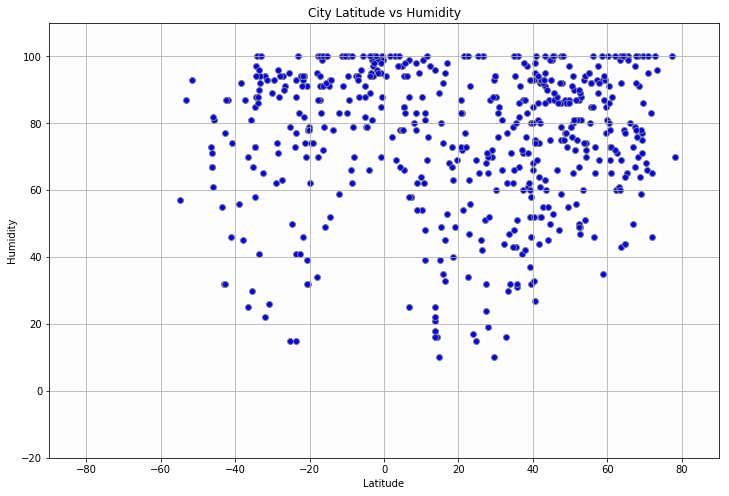

In [20]:
#Sets plot size
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:pale grey')

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o", color='blue', edgecolor='gray')

# Add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)
plt.ylim(-20, 110)

# Save the figure
plt.savefig("images/Lat_vs_Humidity.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

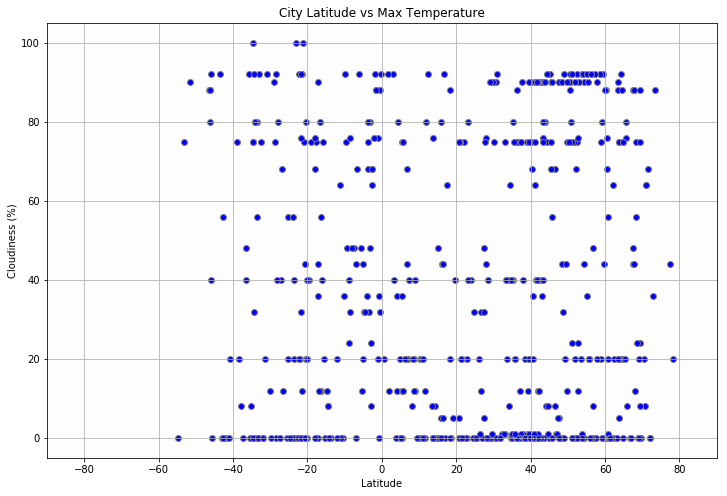

In [21]:
#Sets plot size
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:pale gray')

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o", color='blue', edgecolor='gray')

# Add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("images/Lat_vs_Cloudiness.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

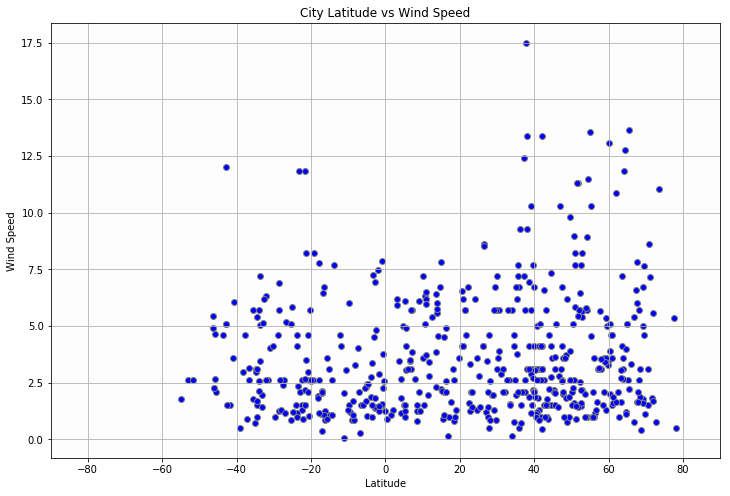

In [22]:
#Sets plot size
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:pale grey')

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o", color='blue', edgecolor='grey')

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("images/Lat_vs_Wind Speed.png")
# Show plot
plt.show()

In [23]:
weather_data['temp_v'] = "xkcd:dark purple"  
# adds column to df, sets <= 0 colors
weather_data.loc[weather_data['temp'] > -17.78, 'temp_v'] = "xkcd:violet"       
# assigns colors to temps by range
weather_data.loc[weather_data['temp'] > -12.22, 'temp_v'] = "xkcd:indigo blue"
weather_data.loc[weather_data['temp'] > -6.66, 'temp_v'] = "xkcd:blue"
weather_data.loc[weather_data['temp'] > -1.11, 'temp_v'] = "xkcd:green"
weather_data.loc[weather_data['temp'] > 4.44, 'temp_v'] = "xkcd:sea green"
weather_data.loc[weather_data['temp'] > 10, 'temp_v'] = "xkcd:yellow green"
weather_data.loc[weather_data['temp'] > 15.55, 'temp_v'] = "xkcd:yellow"
weather_data.loc[weather_data['temp'] > 21.11, 'temp_v'] = "xkcd:orange"
weather_data.loc[weather_data['temp'] > 26.66, 'temp_v'] = "xkcd:reddish orange"
weather_data.loc[weather_data['temp'] > 32, 'temp_v'] = "xkcd:red"

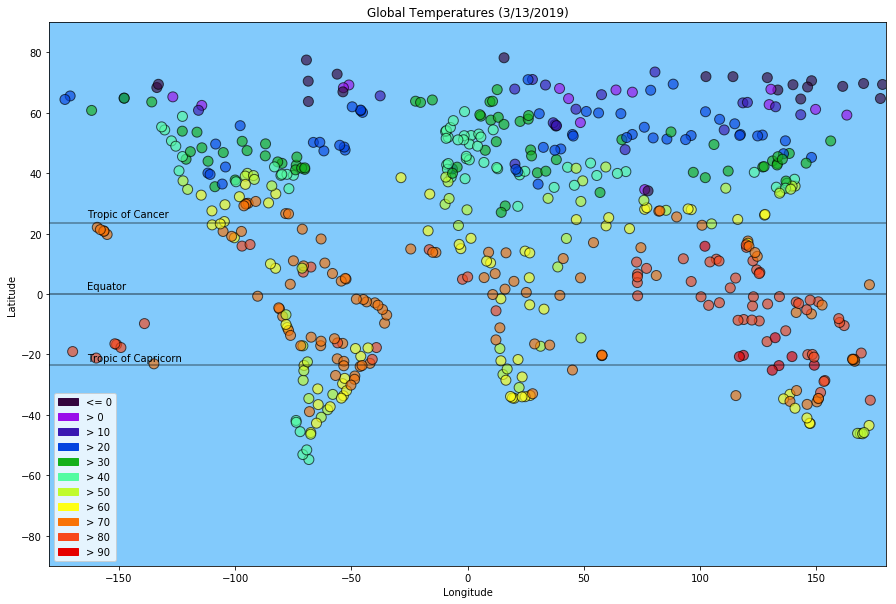

In [24]:
cur_date = datetime.now()
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
plt.gca().set_facecolor('xkcd:sky')
ax.scatter(weather_data['lng'], weather_data['lat'], color=weather_data["temp_v"], s=100,  alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Temperatures (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

templt0 = mpatches.Patch(color='xkcd:dark purple', label='<= 0')
tempgt0 = mpatches.Patch(color='xkcd:violet', label='> 0')
tempgt10 = mpatches.Patch(color='xkcd:indigo blue', label='> 10')
tempgt20 = mpatches.Patch(color='xkcd:blue', label='> 20')
tempgt30 = mpatches.Patch(color='xkcd:green', label='> 30')
tempgt40 = mpatches.Patch(color='xkcd:sea green', label='> 40')
tempgt50 = mpatches.Patch(color='xkcd:yellow green', label='> 50')
tempgt60 = mpatches.Patch(color='xkcd:yellow', label='> 60')
tempgt70 = mpatches.Patch(color='xkcd:orange', label='> 70')
tempgt80 = mpatches.Patch(color='xkcd:reddish orange', label='> 80')
tempgt90 = mpatches.Patch(color='xkcd:red', label='> 90')

plt.legend(handles=[templt0,
                    tempgt0,
                    tempgt10,
                    tempgt20,
                    tempgt30,
                    tempgt40,
                    tempgt50,
                    tempgt60,
                    tempgt70,
                    tempgt80,
                    tempgt90], frameon=True, loc="lower left")

# Save the figure
plt.savefig("images/Global_Temperatures.png")
# Show plot
plt.show()

In [25]:
weather_data['humdy_v'] = ""                                                    # adds column to dataframe
weather_data.loc[weather_data['humidity'] >=0, 'humdy_v'] = "#FFFFFF"              # assigns colors to humidity by range
weather_data.loc[weather_data['humidity'] > 10, 'humdy_v'] = "#E5E5FF"
weather_data.loc[weather_data['humidity'] > 20, 'humdy_v'] = "#CCCCFF"
weather_data.loc[weather_data['humidity'] > 30, 'humdy_v'] = "#B2B2FF"
weather_data.loc[weather_data['humidity'] > 40, 'humdy_v'] = "#9999FF"
weather_data.loc[weather_data['humidity'] > 50, 'humdy_v'] = "#7F7FFF"
weather_data.loc[weather_data['humidity'] > 60, 'humdy_v'] = "#6666FF"
weather_data.loc[weather_data['humidity'] > 70, 'humdy_v'] = "#4C4CFF"
weather_data.loc[weather_data['humidity'] > 80, 'humdy_v'] = "#3333FF"
weather_data.loc[weather_data['humidity'] > 90, 'humdy_v'] = "#1919FF"
weather_data.loc[weather_data['humidity'] >= 100, 'humdy_v'] = "#0000FF"

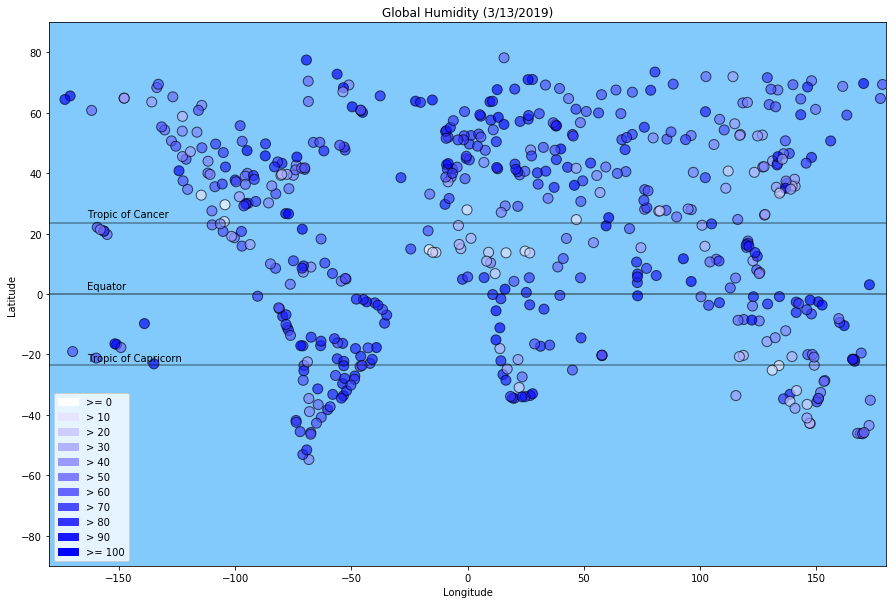

In [26]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
plt.gca().set_facecolor('xkcd:sky')
ax.scatter(weather_data["lng"], weather_data["lat"], color=weather_data["humdy_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Humidity (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

humidityge0 = mpatches.Patch(color='#FFFFFF', label='>= 0')
humiditygt10 = mpatches.Patch(color='#E5E5FF', label='> 10')
humiditygt20 = mpatches.Patch(color='#CCCCFF', label='> 20')
humiditygt30 = mpatches.Patch(color='#B2B2FF', label='> 30')
humiditygt40 = mpatches.Patch(color='#9999FF', label='> 40')
humiditygt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
humiditygt60 = mpatches.Patch(color='#6666FF', label='> 60')
humiditygt70 = mpatches.Patch(color='#4C4CFF', label='> 70')
humiditygt80 = mpatches.Patch(color='#3333FF', label='> 80')
humiditygt90 = mpatches.Patch(color='#1919FF', label='> 90')
humidityge100 = mpatches.Patch(color='#0000FF', label='>= 100')

plt.legend(handles=[humidityge0,
                    humiditygt10,
                    humiditygt20,
                    humiditygt30,
                    humiditygt40,
                    humiditygt50,
                    humiditygt60,
                    humiditygt70,
                    humiditygt80,
                    humiditygt90,
                    humidityge100], frameon=True, loc="lower left")


# Save the figure
plt.savefig("images/Global_Humidity.png")
# Show plot
plt.show()           

In [27]:
weather_data['cloud_v'] = ""                                                    # adds column to dataframe
weather_data.loc[weather_data['cloudiness'] >=0, 'cloud_v'] = "#FFFFFF"              # assigns colors to cloudiness by range
weather_data.loc[weather_data['cloudiness'] > 10, 'cloud_v'] = "#E5E5FF"
weather_data.loc[weather_data['cloudiness'] > 20, 'cloud_v'] = "#CCCCFF"
weather_data.loc[weather_data['cloudiness'] > 30, 'cloud_v'] = "#B2B2FF"
weather_data.loc[weather_data['cloudiness'] > 40, 'cloud_v'] = "#9999FF"
weather_data.loc[weather_data['cloudiness'] > 50, 'cloud_v'] = "#7F7FFF"
weather_data.loc[weather_data['cloudiness'] > 60, 'cloud_v'] = "#6666FF"
weather_data.loc[weather_data['cloudiness'] > 70, 'cloud_v'] = "#4C4CFF"
weather_data.loc[weather_data['cloudiness'] > 80, 'cloud_v'] = "#3333FF"
weather_data.loc[weather_data['cloudiness'] > 90, 'cloud_v'] = "#1919FF"
weather_data.loc[weather_data['cloudiness'] >= 100, 'cloud_v'] = "#0000FF"

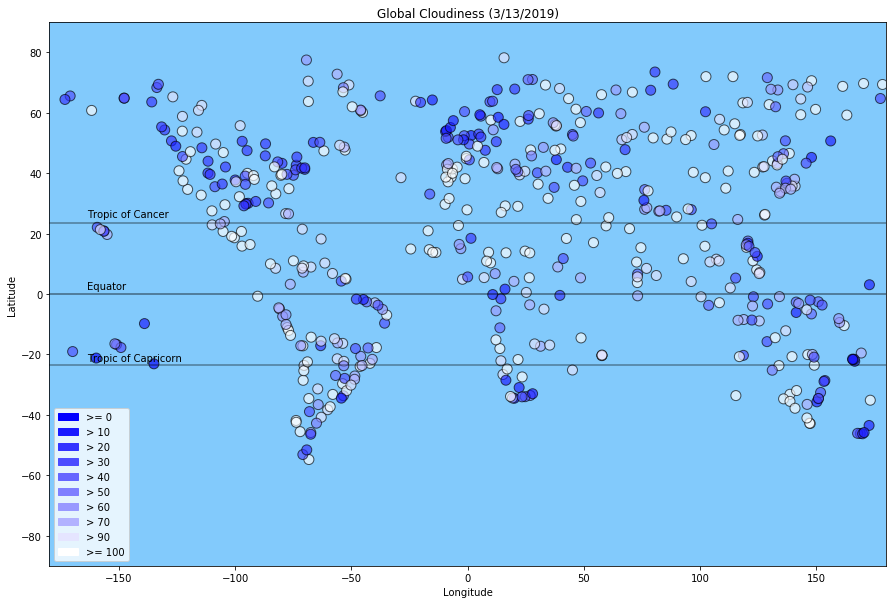

In [28]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
plt.gca().set_facecolor('xkcd:sky')
ax.scatter(weather_data["lng"], weather_data["lat"], color=weather_data["cloud_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Cloudiness (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

cloudsge0 = mpatches.Patch(color='#0000FF', label='>= 0')
cloudsgt10 = mpatches.Patch(color='#1919FF', label='> 10')
cloudsgt20 = mpatches.Patch(color='#3333FF', label='> 20')
cloudsgt30 = mpatches.Patch(color='#4C4CFF', label='> 30')
cloudsgt40 = mpatches.Patch(color='#6666FF', label='> 40')
cloudsgt50 = mpatches.Patch(color='#7F7FFF', label='> 50')
cloudsgt60 = mpatches.Patch(color='#9999FF', label='> 60')
cloudsgt70 = mpatches.Patch(color='#B2B2FF', label='> 70')
cloudsgt80 = mpatches.Patch(color='#CCCCFF', label='> 80')
cloudsgt90 = mpatches.Patch(color='#E5E5FF', label='> 90')
cloudsge100 = mpatches.Patch(color='#FFFFFF', label='>= 100')

plt.legend(handles=[cloudsge0,
                    cloudsgt10,
                    cloudsgt20,
                    cloudsgt30,
                    cloudsgt40,
                    cloudsgt50,
                    cloudsgt60,
                    cloudsgt70,
                    cloudsgt90,
                    cloudsge100], frameon=True, loc="lower left")

# Save the figure
plt.savefig("images/Global_Cloudiness.png")
# Show plot
plt.show()  

In [29]:
weather_data['wind_v'] = ""                                                     
weather_data.loc[weather_data['winds'] >= 0, 'wind_v'] = "xkcd:violet"   
weather_data.loc[weather_data['winds'] > 5, 'wind_v'] = "xkcd:indigo blue"
weather_data.loc[weather_data['winds'] > 10, 'wind_v'] = "xkcd:blue"
weather_data.loc[weather_data['winds'] > 15, 'wind_v'] = "xkcd:green"
weather_data.loc[weather_data['winds'] > 20, 'wind_v'] = "xkcd:sea green"
weather_data.loc[weather_data['winds'] > 35, 'wind_v'] = "xkcd:yellow"
weather_data.loc[weather_data['winds'] > 30, 'wind_v'] = "xkcd:orange"
weather_data.loc[weather_data['winds'] > 35, 'wind_v'] = "xkcd:reddish orange"
weather_data.loc[weather_data['winds'] > 40, 'wind_v'] = "xkcd:red"

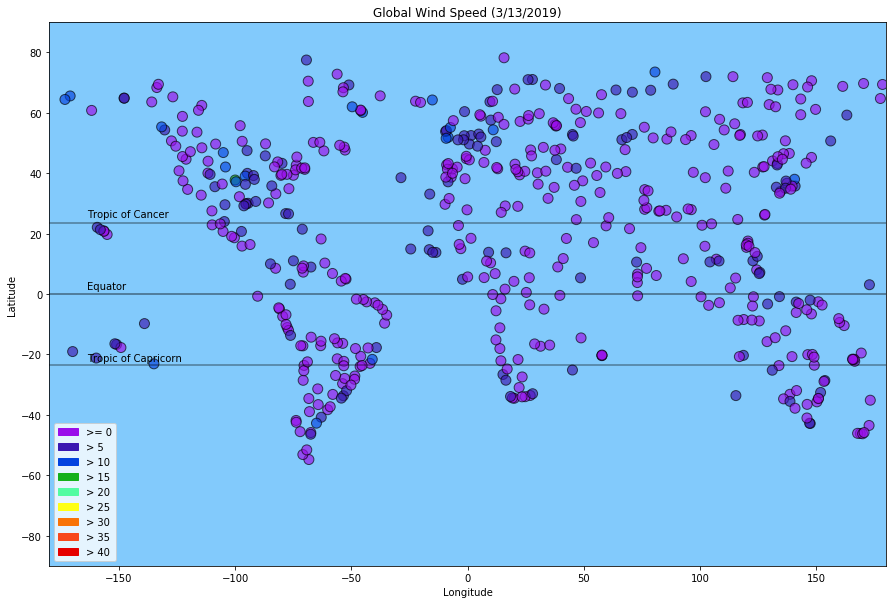

In [30]:
fig = plt.figure(figsize=(15,10))                                            # sets plot parameters
ax = fig.add_subplot(1,1,1)
ax.scatter(weather_data["lng"], weather_data["lat"], color=weather_data["wind_v"], s=100, alpha=.65, edgecolors="k")
handles, labels = ax.get_legend_handles_labels()
plt.gca().set_facecolor('xkcd:sky')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.axhline(0, c='k', alpha = .5)
plt.axhline(23.5, c='k', alpha = .4)
plt.axhline(-23.5, c='k', alpha = .4)
plt.title('Global Wind Speed (%s/%s/%s' % (cur_date.month, cur_date.day, cur_date.year) + ')')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.gcf().text(.16,.51,"Equator", fontsize=10)
plt.gcf().text(.16,.61,"Tropic of Cancer", fontsize=10)
plt.gcf().text(.16,.41,"Tropic of Capricorn", fontsize=10)

windge0 = mpatches.Patch(color='xkcd:violet', label='>= 0')
windgt5 = mpatches.Patch(color='xkcd:indigo blue', label='> 5')
windgt10 = mpatches.Patch(color='xkcd:blue', label='> 10')
windgt15 = mpatches.Patch(color='xkcd:green', label='> 15')
windgt20 = mpatches.Patch(color='xkcd:sea green', label='> 20')
windgt25 = mpatches.Patch(color='xkcd:yellow', label='> 25')
windgt30 = mpatches.Patch(color='xkcd:orange', label='> 30')
windgt35 = mpatches.Patch(color='xkcd:reddish orange', label='> 35')
windgt40 = mpatches.Patch(color='xkcd:red', label='> 40')

plt.legend(handles=[windge0, windgt5, 
                    windgt10, 
                    windgt15, 
                    windgt20, 
                    windgt25, 
                    windgt30, 
                    windgt35, 
                    windgt40], frameon=True, loc="lower left")

# Save the figure
plt.savefig("images/Global_Wind_Speed.png")
# Show plot
plt.show()        